## Observations and Insights 

I was given a dataset of clinical trial data, where 9 treatment regimens were tested on mice to understand their effectiveness in treating squamous cell carcinoma (SCC).
The data included basic information of the mice in the study such as sex, age, and weight.

This was a well designed study with a large total number of subjects, N=249 mice.
1. The mice were split relatively evenly among the 9 treatment regimens and the placebo group, all of them had 25 mice at the start of the study (except for Stelasyn which had 24 mice).
2. The mice were also evely distriubted on sex, with 50.2% male and 49.8% female mice.

In general, if the tumor size was smaller, it can be an indication of an effective treatment. 
In addition, the longer the mice are able to survive on each treatment is another factor to consider when determining the effect of the treatment.

We were asked to consider the final tumor volume of mice on the following 4 treatment regimens - 'Capomulin','Ramicane','Infubinol','Ceftamin'.

Mice on Capomulin and Ramicane had smaller final tumor volumes than those on Infubinol and Ceftamin.
The IQR was lowest for Capomulin and highest for Ceftamin, indicating that tumor volume was less variable among mice treated with Capomulin at their respective final timepoint.
Infubinol had an outlier, and this needs to be taken into account if an significance testing will be done on that in the future. 

Next I looked at a mouse on Capomulin, chosen at random, to see how tumor volume changed with timepoint. It showed a steady decrease which is a positive result.

Finally, concentrating just on Capomulin-treated mice, a plot of the average tumor volume versus average weight across for each mouse over the duration of the study revealed some interesting results.
1. Heavier mice generally had larger tumors, on average.
2. These factors have a strong postiive correlation of 0.84. 
3. A linear regression line was appropriate for this data, and can be used to predict the average tumor volume of a mouse on Capomulin given it's weight. 


In [247]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [248]:
# Check the number of mice.
print(len(mouse_study_df['Mouse ID']))

1893


In [234]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
# Drop any duplicate rows
clean_mouse_study = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

# Recheck the number of mice
print(len(clean_mouse_study))

1888


## Summary Statistics

In [235]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_mouse_study.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
summary_stats.columns = ['tumor_mean', 'tumor_median', 'tumor_var', 'tumor_std','tumor_sem']
summary_stats = summary_stats.reset_index()
print(summary_stats)

  Drug Regimen  tumor_mean  tumor_median  tumor_var  tumor_std  tumor_sem
0    Capomulin   40.675741     41.557809  24.947764   4.994774   0.329346
1     Ceftamin   52.591172     51.776157  39.290177   6.268188   0.469821
2    Infubinol   52.884795     51.820584  43.128684   6.567243   0.492236
3     Ketapril   55.235638     53.698743  68.553577   8.279709   0.603860
4     Naftisol   54.331565     52.509285  66.173479   8.134708   0.596466
5      Placebo   54.033581     52.288934  61.168083   7.821003   0.581331
6     Propriva   52.382993     50.783528  43.220205   6.574208   0.526358
7     Ramicane   40.216745     40.673236  23.486704   4.846308   0.320955
8     Stelasyn   54.233149     52.431737  59.450562   7.710419   0.573111
9    Zoniferol   53.236507     51.818479  48.533355   6.966589   0.516398


## Bar and Pie Charts

In [236]:
# Get the regimens and the mice per regimen
ID_regimen_dedupe = clean_mouse_study.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last')
regimen_mice = ID_regimen_dedupe['Drug Regimen'].value_counts()

regimens = list(regimen_mice.keys())
mice_per_regimen = list(regimen_mice)

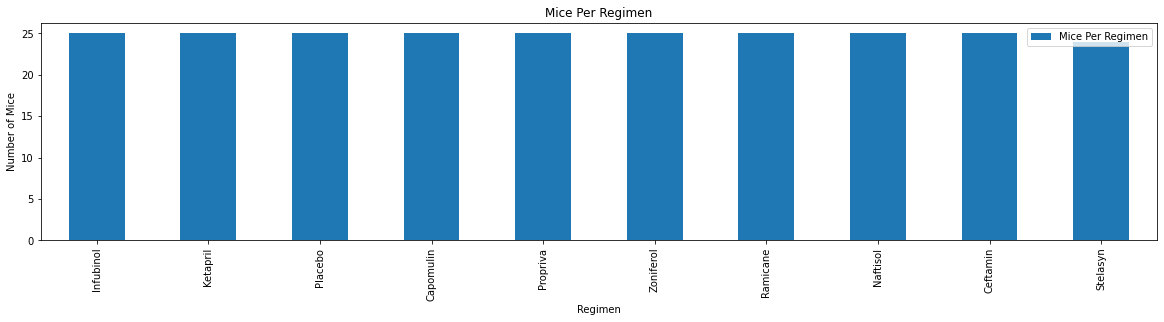

<Figure size 432x288 with 0 Axes>

In [237]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
regimen_mice_df = pd.DataFrame({
    "Regimen":regimens,
    "Mice Per Regimen":mice_per_regimen
})
regimen_mice_df= regimen_mice_df.set_index("Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_mice_df.plot(kind="bar", figsize=(20,4))

# Set a title for the chart
plt.title("Mice Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

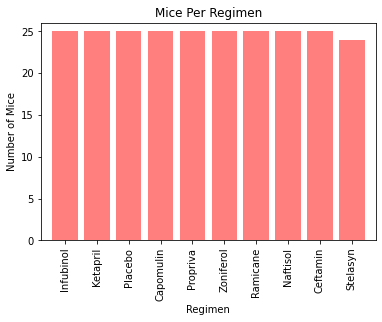

In [238]:
# Generate identical bar plot using pyplot instead of pandas.
# There should be a single bar per regimen

x_axis = np.arange(len(mice_per_regimen))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens,rotation='vertical')

plt.xlim(-0.75, len(regimens)-0.25)
plt.ylim(0, max(mice_per_regimen)+1)

plt.title("Mice Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mice_per_regimen, color='r', alpha=0.5, align="center")


In [239]:
# Get the number of male and female mice used in the study
Male_Female = ID_regimen_dedupe["Sex"].value_counts()
sex = list(Male_Female.keys())
sex_dist = list(Male_Female)

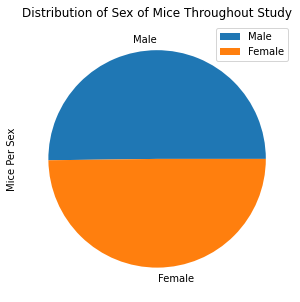

<Figure size 432x288 with 0 Axes>

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist_df = pd.DataFrame({
    "Sex":sex,
    "Mice Per Sex":sex_dist
})
sex_dist_df= sex_dist_df.set_index("Sex")

# Use DataFrame.plot() in order to create a bar chart of the data
plot = sex_dist_df.plot.pie(y="Mice Per Sex", figsize=(5, 5))

# Set a title for the chart
plt.title("Distribution of Sex of Mice Throughout Study")

plt.show()
plt.tight_layout()


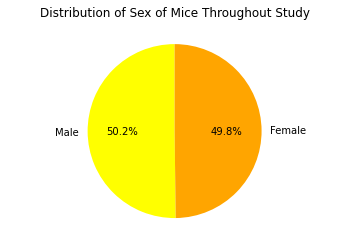

In [241]:
# Generate identical pie plot using pyplot

explode = (0,0)
colors = ["yellow","orange"]

# Set a title for the chart
plt.title("Distribution of Sex of Mice Throughout Study")

# Tell matplotlib to create a pie chart based upon the above data
plt.axis("equal")
plt.pie(sex_dist, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [250]:
# Display dataset for reference
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [218]:
# Create dataframe with the information at the last timepoint for each mouse ID
ID_Timepoint = clean_mouse_study.sort_values(by=['Timepoint'])
ID_Last_Timepoint = ID_Timepoint.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last')

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Final_TumorVol_Capomulin = ID_Last_Timepoint.loc[(ID_Last_Timepoint['Drug Regimen']=="Capomulin")] 
Final_TumorVol_Ramicane = ID_Last_Timepoint.loc[(ID_Last_Timepoint['Drug Regimen']=="Ramicane")]
Final_TumorVol_Infubinol = ID_Last_Timepoint.loc[(ID_Last_Timepoint['Drug Regimen']=="Infubinol")]
Final_TumorVol_Ceftamin = ID_Last_Timepoint.loc[(ID_Last_Timepoint['Drug Regimen']=="Ceftamin")] 
# Concatenate final tumor volumes across 4 regimens into one df
Frames = [Final_TumorVol_Capomulin,Final_TumorVol_Ramicane,Final_TumorVol_Infubinol,Final_TumorVol_Ceftamin]
Final_TumorVol_AllReg = pd.concat(Frames)
Final_TumorVol_AllReg = Final_TumorVol_AllReg.set_index('Drug Regimen')
Final_TumorVol_AllReg

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,w150,Male,23,23,10,39.952347,0
Capomulin,r157,Male,22,25,15,46.539206,0
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,j246,Female,21,21,35,38.753265,1
Capomulin,x401,Female,16,15,45,28.484033,0
...,...,...,...,...,...,...,...
Ceftamin,p438,Female,11,26,45,61.433892,1
Ceftamin,o287,Male,2,28,45,59.741901,4
Ceftamin,a275,Female,20,28,45,62.999356,3


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [246]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for regimen in regimens:
    
    Tumor_Vol_Reg = Final_TumorVol_AllReg.loc[[regimen],['Tumor Volume (mm3)']]
    Tumor_Vol = Tumor_Vol_Reg['Tumor Volume (mm3)']
    
    quartiles = Tumor_Vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume for regimen {regimen} is: {lowerq} (mm3)")
    print(f"The upper quartile of tumor volume for regimen {regimen} is: {upperq} (mm3)")
    print(f"The interquartile range of tumor volume for regimen {regimen} is: {iqr} (mm3)")
    print(f"The the median of tumor volume for regimen {regimen} is: {quartiles[0.5]}(mm3)")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("________________________________________________")

    

The lower quartile of tumor volume for regimen Capomulin is: 32.37735684 (mm3)
The upper quartile of tumor volume for regimen Capomulin is: 40.1592203 (mm3)
The interquartile range of tumor volume for regimen Capomulin is: 7.781863460000004 (mm3)
The the median of tumor volume for regimen Capomulin is: 38.125164399999996(mm3)
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
________________________________________________
The lower quartile of tumor volume for regimen Ramicane is: 31.56046955 (mm3)
The upper quartile of tumor volume for regimen Ramicane is: 40.65900627 (mm3)
The interquartile range of tumor volume for regimen Ramicane is: 9.098536719999998 (mm3)
The the median of tumor volume for regimen Ramicane is: 36.56165229(mm3)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
________________________________________________
The lower quartile of tumor volume for regimen Infubinol is: 54.048

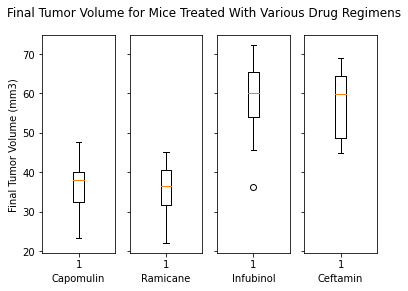

In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,sharey=True)
fig.suptitle('Final Tumor Volume for Mice Treated With Various Drug Regimens')

Tumor_Vol_Reg = Final_TumorVol_AllReg.loc[['Capomulin'],['Tumor Volume (mm3)']]
Tumor_Vol = Tumor_Vol_Reg['Tumor Volume (mm3)']
ax1.set_xlabel('Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(Tumor_Vol)

Tumor_Vol_Reg = Final_TumorVol_AllReg.loc[['Ramicane'],['Tumor Volume (mm3)']]
Tumor_Vol = Tumor_Vol_Reg['Tumor Volume (mm3)']
ax2.set_xlabel('Ramicane')
ax2.boxplot(Tumor_Vol)

Tumor_Vol_Reg = Final_TumorVol_AllReg.loc[['Infubinol'],['Tumor Volume (mm3)']]
Tumor_Vol = Tumor_Vol_Reg['Tumor Volume (mm3)']
ax3.set_xlabel('Infubinol')
ax3.boxplot(Tumor_Vol)

Tumor_Vol_Reg = Final_TumorVol_AllReg.loc[['Ceftamin'],['Tumor Volume (mm3)']]
Tumor_Vol = Tumor_Vol_Reg['Tumor Volume (mm3)']
ax4.set_xlabel('Ceftamin')
ax4.boxplot(Tumor_Vol)

plt.show()

## Line and Scatter Plots

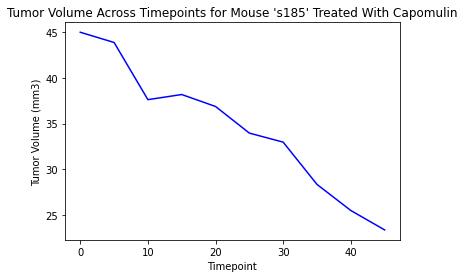

In [221]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
Capomulin_data = clean_mouse_study.loc[(clean_mouse_study['Drug Regimen']=="Capomulin")]
Capomulin_MouseID = Capomulin_data['Mouse ID'].unique()

s185_data = Capomulin_data.loc[(Capomulin_data['Mouse ID']=="s185")]

plt.title("Tumor Volume Across Timepoints for Mouse 's185' Treated With Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(s185_data['Timepoint'], s185_data['Tumor Volume (mm3)'], color="blue" )
plt.show()

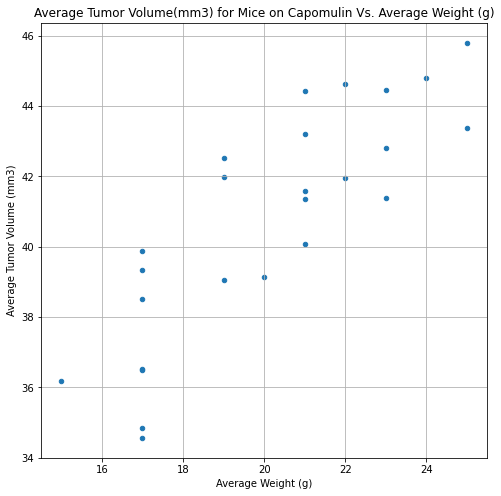

In [222]:
# For each mouse ID, calculate average tumor volume and mouse weight across all the timepoints
Capomulin_data.set_index("Mouse ID")

MouseID = []
weight = []
vol = []

for ID in Capomulin_MouseID:
    
    MouseID.append(ID)
    
    Avg_weight = Capomulin_data.loc[Capomulin_data['Mouse ID']==ID, 'Weight (g)'].mean()
    weight.append(Avg_weight)
    
    Avg_vol = Capomulin_data.loc[Capomulin_data['Mouse ID']==ID, 'Tumor Volume (mm3)'].mean()
    vol.append(Avg_vol)
    
Avg_weight_vol = pd.DataFrame({'MouseID' : MouseID,
                               'AvgWeight' : weight,
                               'AvgTumorVolume' : vol,
                              })
# Generate a scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen
# Convert columns to numeric so the data can be used

Avg_weight_vol.plot(kind="scatter", x="AvgWeight", y="AvgTumorVolume", grid=True, figsize=(8,8),
              title="Average Tumor Volume(mm3) for Mice on Capomulin Vs. Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Average Weight (g)")
plt.show()

## Correlation and Regression

The correlation between average weight(g) and average tumor volume(mm3) for mice on Capomulin is 0.84


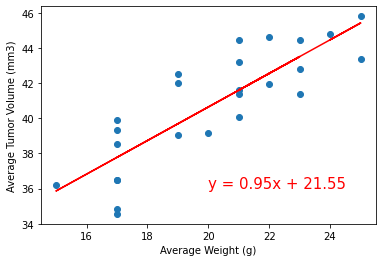

In [226]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Avg_weight_vol['AvgWeight']
y_values = Avg_weight_vol["AvgTumorVolume"]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between average weight(g) and average tumor volume(mm3) for mice on Capomulin is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# print the equation for the line
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


# Observations and Insights